In [87]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_data = study_data.groupby("Drug Regimen")
drug_results = drug_data.mean()
drug_results = drug_results[["Tumor Volume (mm3)"]]
drug_results = drug_results.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
drug_results["Median Tumor Volume (mm3)"] = drug_data["Tumor Volume (mm3)"].median()
drug_results["Tumor Volume Variance"] = drug_data["Tumor Volume (mm3)"].var()
drug_results["Tumor Volume Standard Deviation"] = drug_data["Tumor Volume (mm3)"].std()
drug_results["Tumor Volume SEM"] = drug_data["Tumor Volume (mm3)"].sem()
drug_results

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(-0.75, 9.75)

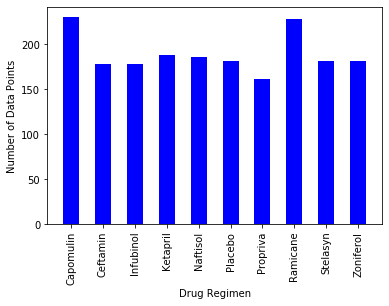

In [89]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = drug_data["Tumor Volume (mm3)"].count()
drug_count.plot(kind="bar", facecolor="blue")

# Format chart
plt.ylabel("Number of Data Points")
 # Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 9.75)

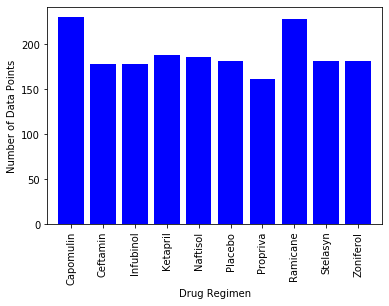

In [90]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_names = study_data["Drug Regimen"].unique()
x_axis = np.arange(len(drug_names))
y_axis = [drug_count[x] for x in range(len(drug_count))]
plt.bar(x_axis, y_axis, color="blue")

# Format chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
tick_locations = [value for value in x_axis]
drug_names.sort()
plt.xticks(tick_locations, drug_names, rotation="90")
plt.xlim(-0.75, len(x_axis)-0.25)

(-1.2076939577793158,
 1.1101719390349558,
 -1.1065652022428258,
 1.1003126286782299)

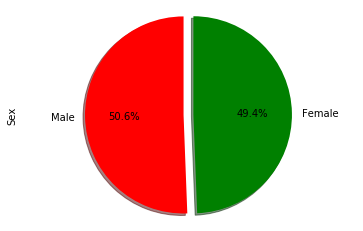

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = study_data["Sex"].value_counts()
mice_sex.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["red", "green"], explode = [0.1,0], shadow=True)
plt.axis('equal')

([<matplotlib.patches.Wedge at 0x1a201be5d0>,
 [Text(-1.1997814585120492, -0.02290091287918403, 'Female'),
  Text(1.0997996703027118, 0.020992503472585713, 'Male')],
 [Text(-0.699872517465362, -0.013358865846190685, '50.6%'),
  Text(0.5998907292560246, 0.011450456439592206, '49.4%')])

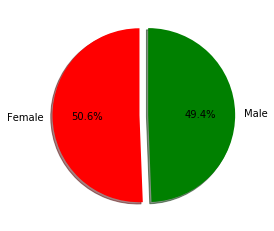

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
gender_counts = [mice_sex[x] for x in range(len(mice_sex))]
colors = ["red", "green"]
explode = [0.1, 0]
plt.pie(gender_counts, labels=sex, colors=colors, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%")